## The notebook for calculating and ploting the summed frequency of a certain variable per year

The queries that can be answered using an adapted version of the following code include but are not limited to:
* Show sum of *'Frequency'* per *'Provenance'* per *'Year'*

### 1. Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
sns.set()
import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import preprocess, sum_freq_per_year, year_freq_df, plot_graph, get_Y_range # module with all functions used for the task

### 2. Load data into pandas dataframe
With `usecols = []`  one specifies which columns from a csv file to load (optional)

In [2]:
df = pd.read_csv('SonataDataNewNew.csv', usecols = [
                                             'Amphora_type', 
                                             'Amphora_type_upper_date', 
                                             'Amphora_type_lower_date', 
                                             'Site', 
                                             'Provenance', 
                                             'Frequency'
                                             ]) 

### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     1707 non-null   object 
 1   Amphora_type             1707 non-null   object 
 2   Provenance               1703 non-null   object 
 3   Frequency                1705 non-null   float64
 4   Amphora_type_lower_date  1701 non-null   object 
 5   Amphora_type_upper_date  1696 non-null   object 
dtypes: float64(1), object(5)
memory usage: 80.1+ KB


In [3]:
# Invalid parsing will be set as NaN
df['Amphora_type_upper_date'] = pd.to_numeric(df['Amphora_type_upper_date'], errors='coerce') 
df['Amphora_type_lower_date'] = pd.to_numeric(df['Amphora_type_lower_date'], errors='coerce') 

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in object names, etc. Thus, to avoid errors while counting

In [4]:
df['Site'] = preprocess(df['Site'])
df['Provenance'] = preprocess(df['Provenance'])
df.head()

,Site,Amphora_type,Provenance,Frequency,Amphora_type_lower_date,Amphora_type_upper_date
0,acqui terme,Dr 6A,adriatic italy,3.0,-25.0,50.0
1,acqui terme,Dr 6B,adriatic italy,7.0,1.0,150.0
2,acqui terme,Dr 7-13,baetica,26.0,-30.0,150.0
3,acqui terme,Haltern 70,baetica,1.0,-80.0,192.0
4,acqui terme,Dr 2-4_5,tyrrhenian italy,4.0,-70.0,225.0


### 4. Group *'Amphora types'* by *'Provenance'* and sum *'Frequencies'*
To that end, one needs to specify the variables on the basis of which the data will be grouped

In the cell below, *'Frequency'*  of each *'Site'* is grouped by  *'Provenance'*, *'Amphora type'*, *'Amphora start date'* and *'Amphora end date'*

Then the grouped frequency values are summed

In [5]:
df_freq = df.groupby(['Provenance', 'Amphora_type', 'Amphora_type_lower_date', 'Amphora_type_upper_date'])['Frequency'].sum()
df_freq = df_freq.reset_index()
df_freq = df_freq.rename(columns = {'Frequency':'Summed_freq'})
df_freq.head()

,Provenance,Amphora_type,Amphora_type_lower_date,Amphora_type_upper_date,Summed_freq
0,adriatic italy,Adriatic,1.0,200.0,570.0
1,adriatic italy,Adriatic_1,100.0,200.0,62.0
2,adriatic italy,Apani I,-150.0,-1.0,1.0
3,adriatic italy,Brindisi,-125.0,-25.0,72.0
4,adriatic italy,Dr 1/Lamb.2,-200.0,-25.0,1.0


### 5. Calculate summed *'Frequency'* of an *'Amphora type'* per *'Year'*

In [6]:
df_freq_year = sum_freq_per_year(data = df_freq,
                                 sum_freq = 'Summed_freq',
                                 lower_date = 'Amphora_type_lower_date',
                                 upper_date = 'Amphora_type_upper_date')

df_freq_year.head()

,Provenance,Amphora_type,Amphora_type_lower_date,Amphora_type_upper_date,Summed_freq,Sum_freq_per_year
0,adriatic italy,Adriatic,1.0,200.0,570.0,2.864322
1,adriatic italy,Adriatic_1,100.0,200.0,62.0,0.620000
2,adriatic italy,Apani I,-150.0,-1.0,1.0,0.006711
3,adriatic italy,Brindisi,-125.0,-25.0,72.0,0.720000
4,adriatic italy,Dr 1/Lamb.2,-200.0,-25.0,1.0,0.005714


### 6. Create a two-column dataframe with *'Years'* and summed *'Frequency'* values
With `freq_df = year_freq_df(df1[df1[' '] == ' ']` one specifies the *'Provenance'* of interest

In [7]:
freq_df_egypt = year_freq_df(data = df_freq_year[df_freq_year['Provenance'] == 'egypt'],     
                             lower_date = 'Amphora_type_lower_date',
                             upper_date = 'Amphora_type_upper_date',
                             sum_freq = 'Sum_freq_per_year')   

In [8]:
freq_df_blacksea = year_freq_df(data = df_freq_year[df_freq_year['Provenance'] == 'black sea'],   
                                lower_date = 'Amphora_type_lower_date',
                                upper_date = 'Amphora_type_upper_date',
                                sum_freq = 'Sum_freq_per_year')  

In [11]:
freq_df_italy = year_freq_df(data = df_freq_year[df_freq_year['Provenance'] == 'adriatic italy'],   
                                lower_date = 'Amphora_type_lower_date',
                                upper_date = 'Amphora_type_upper_date',
                                sum_freq = 'Sum_freq_per_year')  

### 7. Plot the graphs

#### 7.1 Create a dictionary for plotting
Now a dictionary containing the above dataframes is made. The keys (what is incapsulated in ' ') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [13]:
df_dictionary = {'Egypt': freq_df_egypt, 'Black Sea': freq_df_blacksea}

In [14]:
df_dictionary2 = {'Egypt': freq_df_egypt, 'Adriatic Italy': freq_df_italy}

#### 7.2 Plot and save
Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. 

To change the colour of lines, pass a list of strings with colour names to `palette` argument. 

To change the default `'solid'` line, pass f.ex., `'dashed'` to `linestyle` argument.o not show 

To hide values on axis uncomment `ax.axes.xaxis.set_ticks([])` for X and `ax.axes.yaxis.set_ticks([])` for Y.

To plot a single line graph specify only 1 axes in this line `fig, ax = plt.subplots(figsize=(20, 11))` and use this `ax` variable as an input for `ax` argument in `plotgraph()`. 
To plot 2 and more graphs side by side:
1. specify that many axes as graphs and the respective number of rows/columns of the subplot grid. F.ex., to plot 2 lie=ne graphs `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 11))`
2. call `plot_graph()` on each `dictionary` and use the respective `ax` variable as an input for `ax` argument in `plotgraph()`.  
F.ex., in `plot_graph(dicts_of_df = provenance_count, palette=['green'], linestyle = 'dashed', ax = ax1)` the line graph for dic with provenances will be refered as `ax1` and placed on the **right** side of the graph.

**Note**: Remember to set labels, background colour, etc for both axes like in the example below.

/tmp/ipykernel_38883/543999027.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


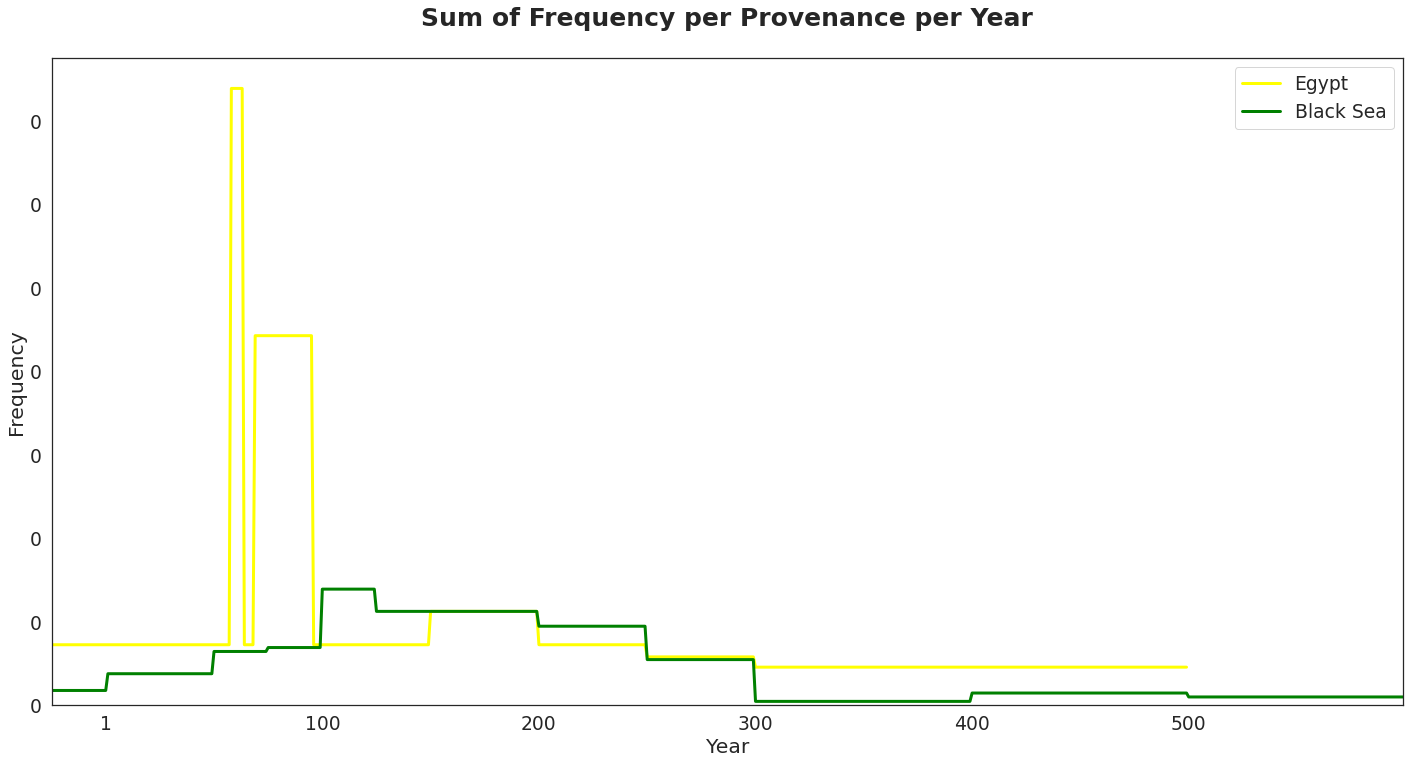

In [15]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum of Frequency per Provenance per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./freq_per_year.pdf')

/tmp/ipykernel_38883/900728817.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
/tmp/ipykernel_38883/900728817.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


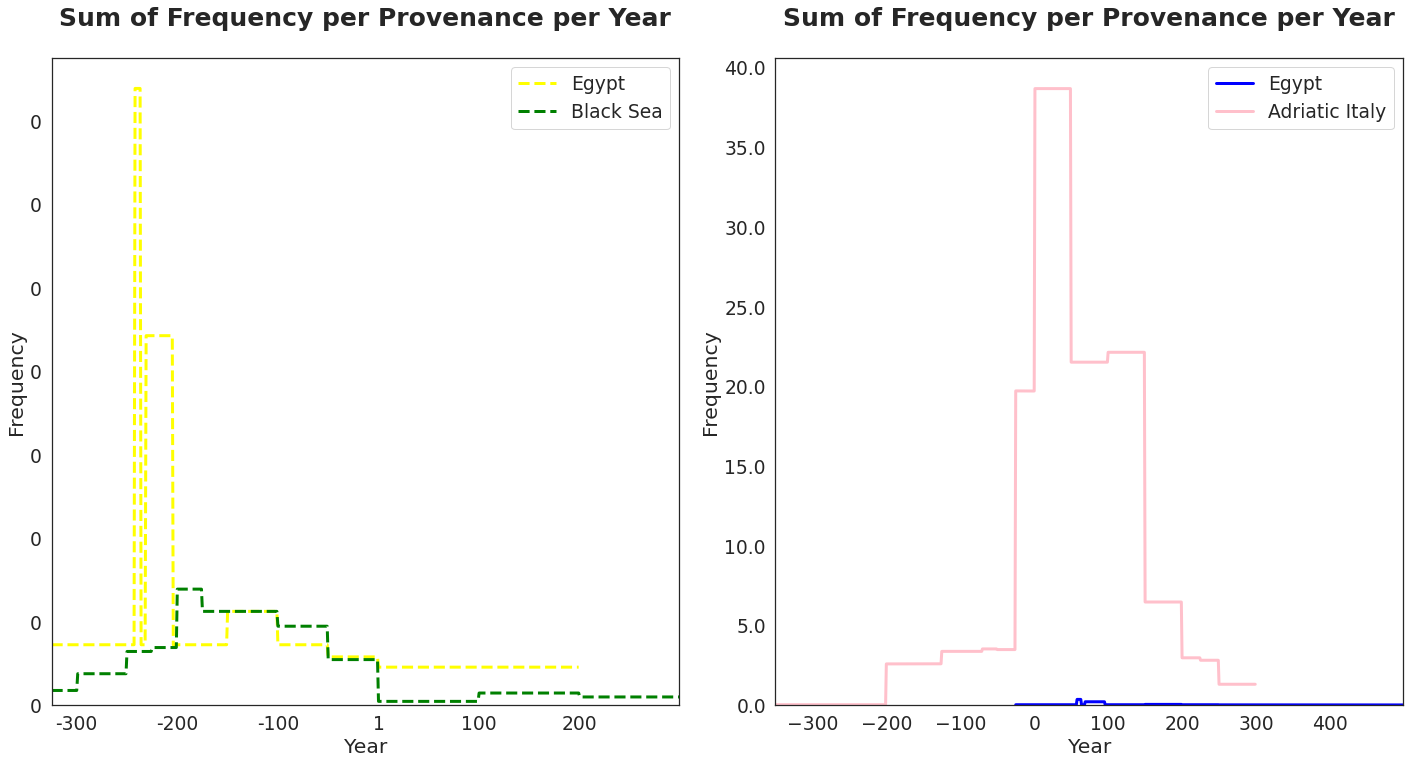

In [16]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary)
minimum2, maximum2 = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],
           linestyle = 'dashed',
           ax = ax1)
           

plot_graph(dicts_of_df = df_dictionary2,
            palette=['blue', 'pink'],
            linestyle = 'solid',
            ax = ax2)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)

#Change background colour
ax1.set_facecolor("white")  
ax2.set_facecolor("white")

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")


#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
ax1.set_title(label = 'Sum of Frequency per Provenance per Year', size=25, y=1.04, fontweight='bold')

ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])
ax2.set_title(label = 'Sum of Frequency per Provenance per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./Frequency.pdf')